# **Name : Vedant Vijay Kharkar**

# **The Spark Foundation, GRIP January 22**

# Data Science & Business Analytics Intern

# Task 2 : Prediction Using Unsupervised ML.

# Aim : Predict the optimum no. of clusters and represent it visually.

## Dataset : Iris Datset

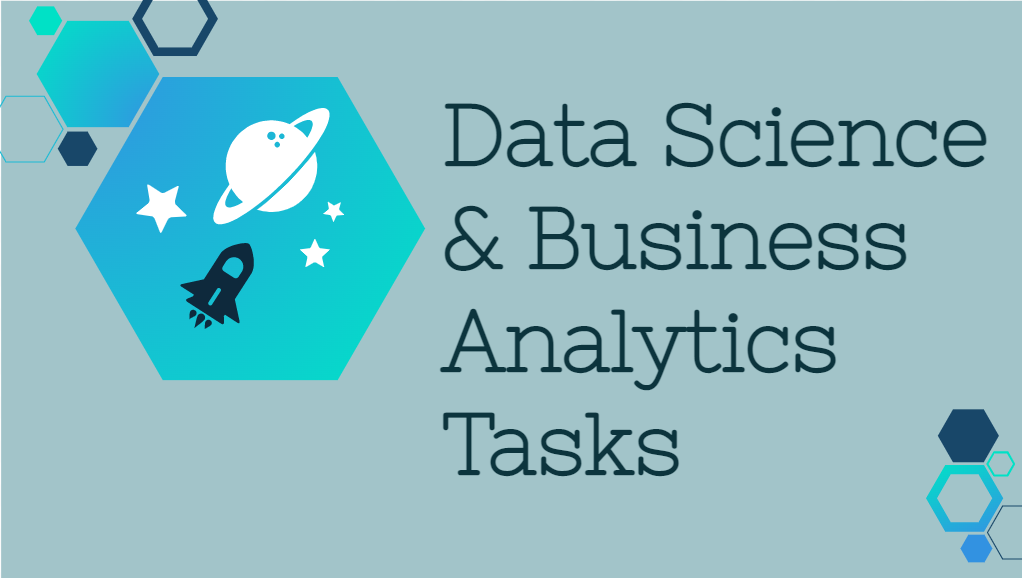

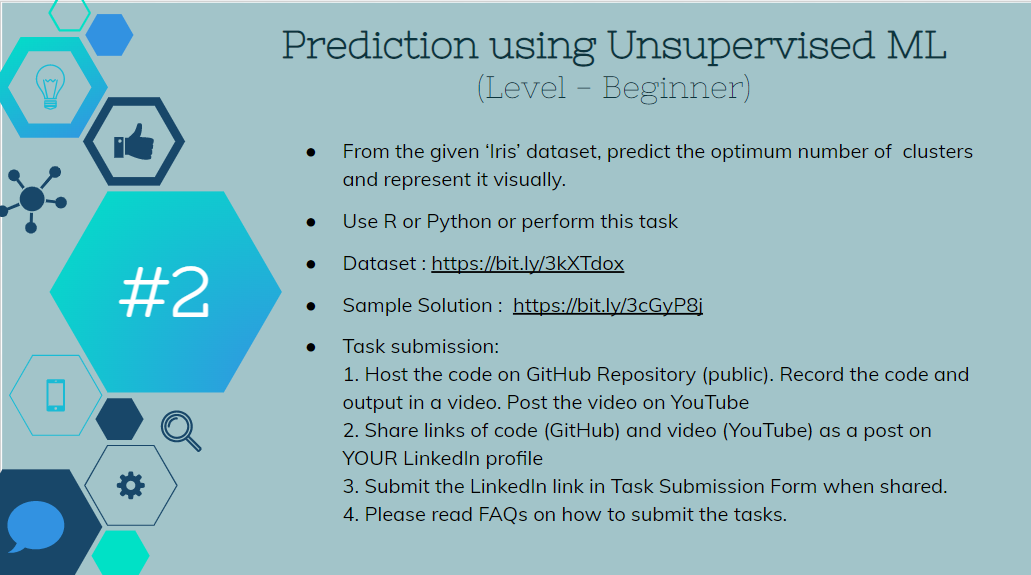

# **Importing The Dependencies**

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Loading the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [ ]:
iris = pd.read_csv("Iris.csv")

### Exploring the Iris Dataset

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
iris.drop("Id", axis=1, inplace=True)

In [ ]:
iris.shape

(150, 5)

In [ ]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Check if any null value is present

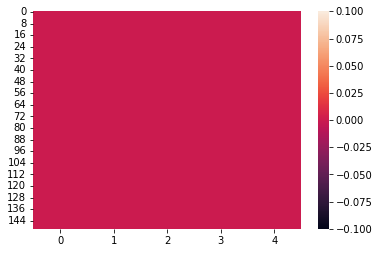

In [ ]:
import seaborn as sns
c = sns.heatmap(iris.isnull().values)

### Checking how many other zero values

In [ ]:
print("total number of rows : {0}".format(len(iris)))
print("number of missing Values in Hours: {0}".format(len(iris.loc[iris['SepalLengthCm'] == 0])))
print("number of missing Values in Scores: {0}".format(len(iris.loc[iris['SepalWidthCm'] == 0])))
print("number of missing Values in Scores: {0}".format(len(iris.loc[iris['PetalLengthCm'] == 0])))
print("number of missing Values in Scores: {0}".format(len(iris.loc[iris['PetalWidthCm'] == 0])))

total number of rows : 150
number of missing Values in Hours: 0
number of missing Values in Scores: 0
number of missing Values in Scores: 0
number of missing Values in Scores: 0


In [ ]:
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

## **Plotting Pair Plot**

<Figure size 1440x720 with 0 Axes>

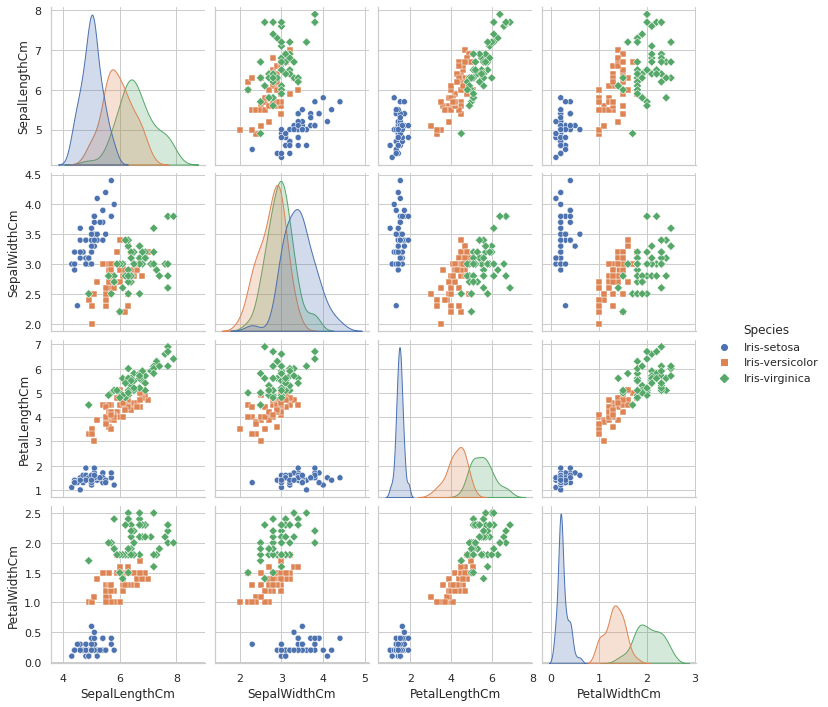

In [ ]:
sns.set(style = "whitegrid")
plt.figure(figsize = (20,10))
sns.pairplot(iris, plot_kws = {'color': 'violet'}, hue="Species", markers=["o","s","D"] )

## **Corelational Matrix**

In [ ]:
corrmat = iris.corr()

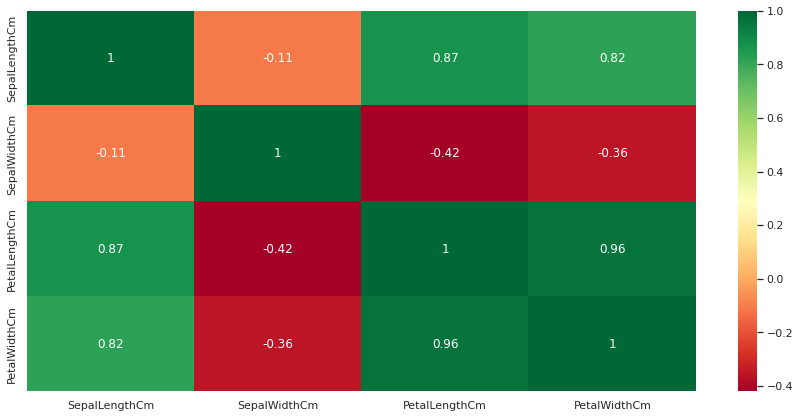

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(iris.corr(),annot=True, cmap="RdYlGn")

In [ ]:
x = iris.iloc[:, [0, 1, 2, 3]].values

## **K-Means Clustering Algorithm**

### Finding the optimum number of clusters for k-means classification



In [ ]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

### Plotting the results onto a line graph, allowing us to observe 'The elbow'

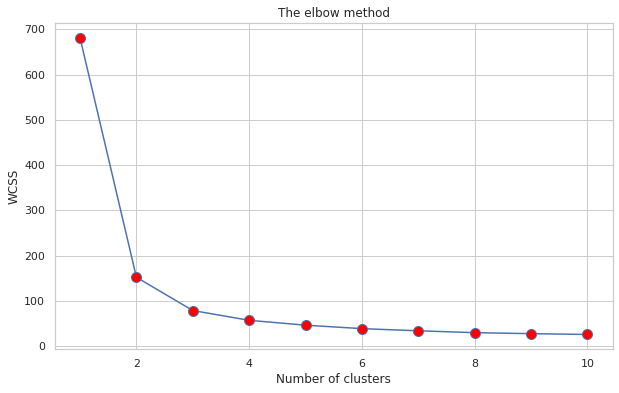

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o', markerfacecolor='red', markersize=10)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

### You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.From this we choose the number of clusters as **3**

## **Applying kmeans to the dataset / Creating the kmeans classifier**

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_pred = kmeans.fit_predict(x)

## Visualising the clusters

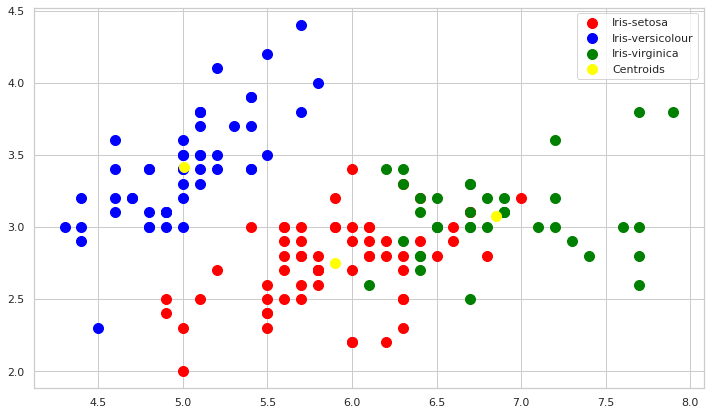

In [ ]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(12,7))
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()